# Statistical Hypothesis Testing

## Exercise 1 - Two Boxes 

### Imagine there is an opaque box in front of you. You know it contains either 1 black ball and 4 white balls or it contains 2 black balls and 3 white balls. 
### You can randomly pick a ball, check its color and return it to the box. You can do this as n times, where n is a parameter.
### How would you figure out which box you have? Can you calculate what are errors values in this process?

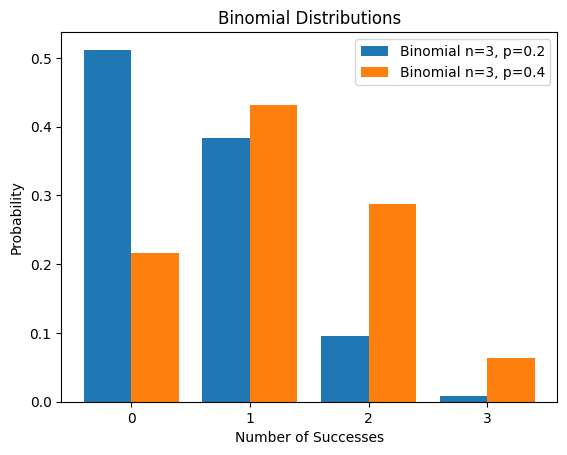

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the Binomial distributions
n_trials_boxes = 3  # number of trials
p_box1 = 0.2
p_box2 = 0.4

# Generate data
x = np.arange(0, n_trials_boxes+1)
binom1 = binom.pmf(x, n_trials_boxes, p_box1)
binom2 = binom.pmf(x, n_trials_boxes, p_box2)

# Plot the distributions
plt.bar(x - 0.2, binom1, width=0.4, label=f'Binomial n={n_trials_boxes}, p={p_box1}', align='center')
plt.bar(x + 0.2, binom2, width=0.4, label=f'Binomial n={n_trials_boxes}, p={p_box2}', align='center')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distributions')
plt.xticks(x)
plt.legend()
plt.show()

In [2]:
# Prepare data for the table
data = []
for i in range(n_trials_boxes + 1):
    alpha = round(sum(binom1[n_trials_boxes - i:]), 3)
    beta = round(sum(binom2[:n_trials_boxes - i]), 3)
    total_error = round(alpha + beta, 3)
    data.append([n_trials_boxes - i, alpha, beta, total_error])

# Create a DataFrame
df = pd.DataFrame(data, columns=['n', 'Alpha', 'Beta', 'Alpha + Beta'])

# Print the table
print(df)

   n  Alpha   Beta  Alpha + Beta
0  3  0.008  0.936         0.944
1  2  0.104  0.648         0.752
2  1  0.488  0.216         0.704
3  0  1.000  0.000         1.000


## Exercise 2 - Coin tossing

### You have a coin and you want to check if it is fair (both sides are equally likely). You toss the coin n times and you get k heads.
### What values do erros have in this case? Can you calculate them?

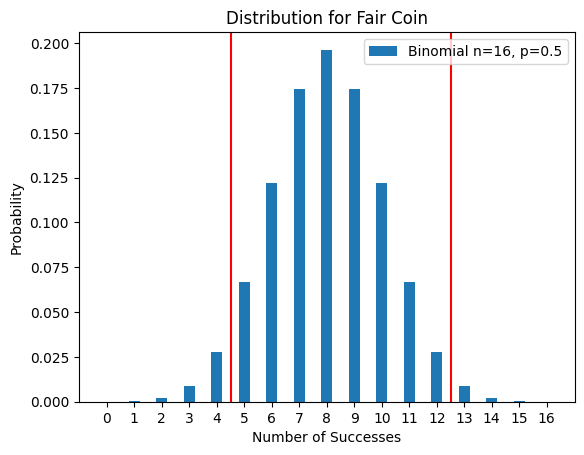

In [3]:
# Parameters for the Binomial distribution
n_trails_coin = 16  # number of trials
k = 4  # number of successes
p_fair = 0.5

# Generate data
x_coin = np.arange(0, n_trails_coin + 1)
binom_fair = binom.pmf(x_coin, n_trails_coin, p_fair)

# Plot the distribution
plt.bar(x_coin, binom_fair, width=0.4, label=f'Binomial n={n_trails_coin}, p={p_fair}', align='center')

plt.axvline(x=k + 0.5, color='red', linestyle='-')
plt.axvline(x=n_trails_coin - k + 0.5, color='red', linestyle='-')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Distribution for Fair Coin')
plt.xticks(x_coin)
plt.legend()
plt.show()

In [4]:
def plot_binomial(p_unfair: float):
    # Generate data for the new distribution
    binom_unfair = binom.pmf(x_coin, n_trails_coin, p_unfair)
    
    # Plot the distributions
    plt.bar(x_coin - 0.2, binom_fair, width=0.4, label=f'Binomial n={n_trails_coin}, p={p_fair}', align='center')
    plt.bar(x_coin + 0.2, binom_unfair, width=0.4, label=f'Binomial n={n_trails_coin}, p={p_unfair}', align='center')
    
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title('Binomial Distributions')
    plt.xticks(x_coin)
    plt.legend()
    plt.show()

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

interact(plot_binomial, p_unfair=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1))

interactive(children=(FloatSlider(value=0.5, description='p_unfair', max=1.0), Output()), _dom_classes=('widge…

<function __main__.plot_binomial(p_unfair: float)>

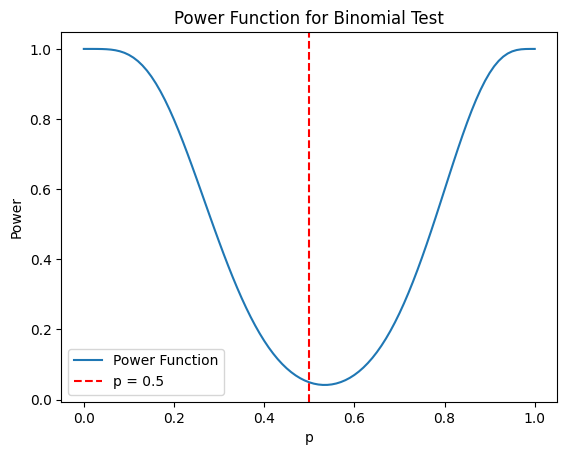

In [6]:
# Define the significance level
alpha = 0.05

# Define the range of p values to test
p_values = np.linspace(0, 1, 101)

# Calculate the critical values for the two-sided test
critical_value_low = binom.ppf(alpha / 2, n_trails_coin, p_fair)
critical_value_high = binom.ppf(1 - alpha / 2, n_trails_coin, p_fair)

# Calculate the power function
power = []
for p in p_values:
    power.append(1 - (binom.cdf(critical_value_high, n_trails_coin, p) - binom.cdf(critical_value_low, n_trails_coin, p)))

# Plot the power function
plt.plot(p_values, power, label='Power Function')
plt.axvline(p_fair, color='r', linestyle='--', label=f'p = {p_fair}')
plt.xlabel('p')
plt.ylabel('Power')
plt.title('Power Function for Binomial Test')
plt.legend()
plt.show()

## Exercise 3 - Coin toss experiment design

### Now you are asked to design an experiment to check if a coin is fair. In other words we need to find out how many times we need to toss the coin to be sure that the coin is fair.
### How many trials do we need to be sure that First Type Error is less than alpha and Second Type Error is less than beta for an unfair coin with the parameter p_unfair?

In [7]:
# Parameters
alpha_threshold = 0.05
beta_threshold = 0.1
p_fair = 0.5  # Assumed null hypothesis probability
p_unfair = 0.6  # Alternative hypothesis probability

# Initialize variables
n = 1
n_max = 500

while n <= n_max:
    for i in range(n + 1):
        # Calculate alpha for the current i
        alpha = (binom.cdf(n / 2 - i, n, p_fair) +
                 (1 - binom.cdf(n / 2 + i, n, p_fair)))
        if alpha < alpha_threshold:
            break
    
    # Calculate beta for the current n and i
    beta = (binom.cdf(n / 2 + i, n, p_unfair) -
            binom.cdf(n / 2 - i, n, p_unfair))
    if beta < beta_threshold:
        break
    
    # Increment sample size
    n += 1

# Print the results
print(f"n: {n}, i: {i}, alpha: {alpha:.5f}, beta: {beta:.5f}")

n: 263, i: 16, alpha: 0.04827, beta: 0.09784


In [8]:
def calculate_alpha_beta(n, lower, upper, p1, p2):
    """
    Calculate alpha and beta for a binomial test.

    Parameters:
    - n: int, sample size
    - lower: int, lower bound of the critical region
    - upper: int, upper bound of the critical region
    - p1: float, null hypothesis probability
    - p2: float, alternative hypothesis probability

    Returns:
    - alpha and beta values
    """
    alpha = binom.cdf(lower, n, p1) + (1 - binom.cdf(upper, n, p1))
    beta = binom.cdf(upper, n, p2) - binom.cdf(lower, n, p2)
    return  alpha, beta

In [9]:
while n <= n_max:
    for i in range(int(n/2)):
        alpha, beta = calculate_alpha_beta(n, int(n/2-i), int(n/2+i), p_fair, p_unfair)
    
        if alpha < alpha_threshold and beta < beta_threshold:
            optimal_n = n
            break
    if optimal_n:
        break
    else:
        n += 1

# Print the results
print(f"n: {n}, i: {i}, alpha: {alpha:.5f}, beta: {beta:.5f}")

n: 263, i: 16, alpha: 0.04827, beta: 0.09784


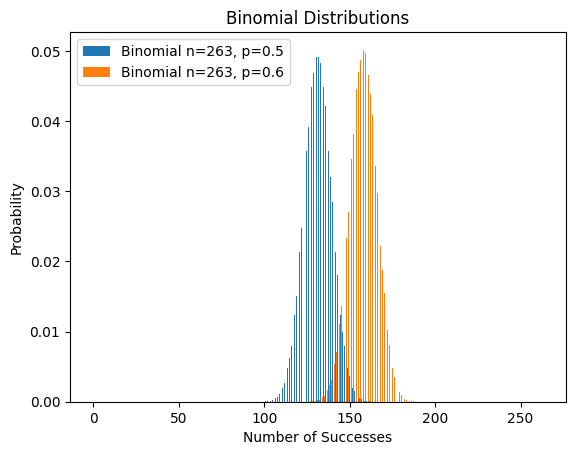

In [10]:
x_new = np.arange(0, optimal_n + 1)
binom_fair = binom.pmf(x_new, optimal_n, p_fair)
binom_unfair = binom.pmf(x_new, optimal_n, p_unfair)

# Plot the distributions
plt.bar(x_new - 0.2, binom_fair, width=0.4, label=f'Binomial n={optimal_n}, p={p_fair}', align='center')
plt.bar(x_new + 0.2, binom_unfair, width=0.4, label=f'Binomial n={optimal_n}, p={p_unfair}', align='center')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distributions')
# plt.xticks(x_new)
plt.legend()
plt.show()